# WELCOME to my Notebook. Please run this notebook to get the actual submissions.csv file

In [7]:
%matplotlib inline  
import matplotlib.pyplot as pl
import csv

# This block of code takes care of preprocessing the training dataset
with open('df_training_scholarjet.csv') as csv_file:
    my_reader = csv.reader(csv_file)
    count = 0
    X = []
    revenue_labels = []
    conversion_labels = []
    
    # This dictionary helps us in converting categorical features into numerical features
    float_converter = {'Onboarding': '0.0', 'Retention': '1.0', 'Unmanaged': '2.0', 'Enrolled': '0.0', 'Active': '1.0', 'In Progress': '2.0', 'Inactive': '3.0', 'Unconfirmed': '4.0', 'Business': '0.0', 'Trade': '1.0', 'US': '0.0', 'CA': '1.0', 'Internal Application': '0.0', 'Search - Paid': '1.0', 'Internal Customer Scrape': '2.0', 'Affiliates': '3.0', 'External Application': '4.0', 'Social - Paid': '5.0', 'Other': '6.0', 'Email': '7.0', 'Display - Retargeting': '8.0', 'Gateway': '9.0', 'Display - Acquisition': '10.0', 'Bulk Upload': '11.0', 'Quotes': '12.0', 'Referral': '13.0', 'Self ID': '14.0', 'Partners': '15.0', 'None': '0.0', 'Primary': '1.0', 'Purchaser': '2.0', 'Other': '3.0', '6to10': '2.0', '11to50': '3.0', '50plus': '4.0', '2to5': '5.0', '1to2': '1.0', '3to5': '3.0', '11to25': '4.0', '25plus': '5.0', 'lessthan1': '1.0', '1to5': '2.0', '5to25': '3.0', '100plus': '4.0', '25to100': '5.0', 'directEIN': '0.0', 'phone': '1.0', 'email': '2.0', 'liveTransfer': '3.0', 'other': '4.0', 'directOther': '5.0'}
    for row in my_reader:
        if count > 0:
            new_row = []
            for item in row[4:]:
                # If an attribute of a datapoint is unknown, we append 0 as default
                if len(item) == 0:
                    new_row.append('0.0')
                else:
                    try:
                        # Filtering out the categorical attributes
                        float(item)
                        new_row.append(item)
                    except:
                        # Converting the categorical attributes to numerical
                        new_row.append(float_converter[item])
            conversion_labels.append(row[2])
            revenue_labels.append(row[3])
            X.append(new_row)
        count += 1
    
    print("Number of data points: ", len(X))
    print("Number of features: ", len(X[0]))
        
    

Number of data points:  28126
Number of features:  180


In [4]:
# This block of code takes care of preprocessing the test dataset just like the train dataset
with open('df_holdout_scholarjet.csv') as csv_file:
    my_reader = csv.reader(csv_file)
    count = 0
    test = []
    revenue_labels = []
    conversion_labels = []
    cuid = []
    float_converter = {'Onboarding': '0.0', 'Retention': '1.0', 'Unmanaged': '2.0', 'Enrolled': '0.0', 'Active': '1.0', 'In Progress': '2.0', 'Inactive': '3.0', 'Unconfirmed': '4.0', 'Business': '0.0', 'Trade': '1.0', 'US': '0.0', 'CA': '1.0', 'Internal Application': '0.0', 'Search - Paid': '1.0', 'Internal Customer Scrape': '2.0', 'Affiliates': '3.0', 'External Application': '4.0', 'Social - Paid': '5.0', 'Other': '6.0', 'Email': '7.0', 'Display - Retargeting': '8.0', 'Gateway': '9.0', 'Display - Acquisition': '10.0', 'Bulk Upload': '11.0', 'Quotes': '12.0', 'Referral': '13.0', 'Self ID': '14.0', 'Partners': '15.0', 'None': '0.0', 'Primary': '1.0', 'Purchaser': '2.0', 'Other': '3.0', '6to10': '2.0', '11to50': '3.0', '50plus': '4.0', '2to5': '5.0', '1to2': '1.0', '3to5': '3.0', '11to25': '4.0', '25plus': '5.0', 'lessthan1': '1.0', '1to5': '2.0', '5to25': '3.0', '100plus': '4.0', '25to100': '5.0', 'directEIN': '0.0', 'phone': '1.0', 'email': '2.0', 'liveTransfer': '3.0', 'other': '4.0', 'directOther': '5.0'}
    for row in my_reader:
        if count > 0:
            new_row = []
            for item in row[2:]:
                if len(item) == 0:
                    new_row.append('0.0')
                else:
                    try:
                        float(item)
                        new_row.append(item)
                    except:
                        new_row.append(float_converter[item])
            new_row = [float(item) for item in new_row]
            cuid.append(row[1])
            test.append(new_row)
        count += 1
    
    print("Number of testing samples: ", len(test))
    print("Number of features: ", len(test[0]))
        
    

Number of testing samples:  30375
Number of features:  180


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Creating an SVM with default parameters but making sure it has the ability to predict probability
clf = SVC(probability = True)
clf.fit(X, conversion_labels)


C:\Users\Shark\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
# Using the default SVM to predict conversion probabilities
svm_conversions = clf.predict_proba(test)
print(svm_conversions)

# Visualizing the information in a boxplot
plt.title("Boxplot for a Default SVM")
plt.boxplot(svm_conversions)
plt.show()

['0' '0' '0' ..., '0' '0' '0']


In [ ]:
from sklearn.linear_model import LogisticRegression as lr

# Creating a regression model for predicting revenues 
print("Creating a Logistic Regression")
clf2 = lr()
clf2.fit(X, revenue_labels)
print("Done creating it")


Creating a Logistic Regression


C:\Users\Shark\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shark\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
revenues = clf2.predict(test)
print(revenues)
plt.title("Boxplot for Logistic Regression")
plt.boxplot(revenues)
plt.show()

NameError: name 'clf2' is not defined

In [ ]:
# This piece of code totally works but is taking too long to execute
"""
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Applying Hyperparameter tuning for a more accurate SVM
parameters = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'],
                                  'probability': [True]}
grid = GridSearchCV(SVC(), parameters, cv=10)
grid.fit(X, conversion_labels)
params = grid.best_params_
print(params)
clf3 = SVC(**params)


clf3.fit(X, conversion_labels)
"""

In [2]:
from keras import Sequential
from keras.layers import Dense

try:
    #Sequential is the classical option for creating a NN in Keras (multiple layers interconnected)
    classifier = Sequential()
    """
    We have 101 input features and one target variable (friend/foe), 2 hidden layers each hidden 
    layer have 4 nodes.
    """
    #First Hidden Layer
    classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=180))
    #Second  Hidden Layer
    classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

    """
    *As this is a binary classification problem, we use binary_crossentropy to calculate the loss function 
    between the actual output and the predicted output.

    *To optimize the Neural Network Adam approach is used. Adam stands for Adaptive moment estimation. Adam 
    is a combination of RMSProp + Momentum. Momentum takes the past gradients into account in order to 
    smooth out the gradient descent.
    """
    #Compiling the neural network
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
except IOError as e:
    print ("Could not read file")
    print(e)
except Exception as e:
    print ("Unexpected error")
    print(e)     

Using TensorFlow backend.


In [6]:
import numpy as np

X = np.array(X)
conversion_labels = np.array(conversion_labels)
classifier.fit(X, conversion_labels, batch_size=100, epochs=10)

Epoch 1/10
28126/28126 [==============================] - 3s 119us/step - loss: 0.3894 - acc: 0.8898
Epoch 2/10
28126/28126 [==============================] - 3s 104us/step - loss: 0.3150 - acc: 0.8959
Epoch 3/10
28126/28126 [==============================] - 3s 102us/step - loss: 0.3087 - acc: 0.8959
Epoch 4/10
28126/28126 [==============================] - 3s 104us/step - loss: 0.2988 - acc: 0.8959
Epoch 5/10
28126/28126 [==============================] - 3s 103us/step - loss: 0.2984 - acc: 0.8959
Epoch 6/10
28126/28126 [==============================] - 3s 102us/step - loss: 0.2927 - acc: 0.8959
Epoch 7/10
28126/28126 [==============================] - 3s 103us/step - loss: 0.2914 - acc: 0.8959
Epoch 8/10
28126/28126 [==============================] - 3s 103us/step - loss: 0.2908 - acc: 0.8959
Epoch 9/10
28126/28126 [==============================] - 3s 103us/step - loss: 0.2920 - acc: 0.8959
Epoch 10/10
28126/28126 [==============================] - 3s 104us/step - loss: 0.2889 - a

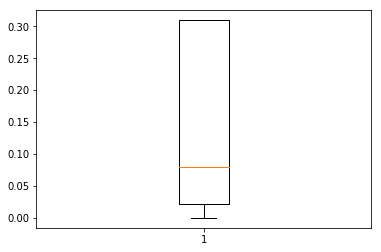

In [10]:
NN_conversions = classifier.predict(test)
print(NN_conversions)
plt.title("Boxplot for Neural Network")
plt.boxplot(NN_conversions)
plt.show()

In [3]:
import csv

with open('submission.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['cuid', 'convert_30', 'revenue_30'])
    for i in range(0, len(cuid)):
        writer.writerow([cuid[i], probabilities[i], revenues[i]])
    

NameError: name 'cuid' is not defined